In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import locale
locale.setlocale(locale.LC_ALL,'')

'en_US.UTF-8'

In [42]:
# Manera tradicional (con un interés fijo).

cap=10000 # Inversión o capital inicial.
años=30 # Número de años.
i=.07 # Interés.
acap=10000 # Capital aportado cada año.

cy=[]
tabla=pd.DataFrame(index=list(range(años)),columns=['Cantidad'])    
for a in range(años):
    cf=cap*(1+i)+acap
    tabla.loc[a,'Cantidad']=locale.currency(cf,grouping=True)
    cap=cf
    
tabla

,Cantidad
0,"$20,700.00"
1,"$32,149.00"
2,"$44,399.43"
3,"$57,507.39"
4,"$71,532.91"
5,"$86,540.21"
6,"$102,598.03"
7,"$119,779.89"
8,"$138,164.48"
9,"$157,835.99"


In [41]:
# Generar un posible futuro basado en la historia del mercado. 

capii=10000 # Inversión inicial.
ie=.09 # Interés esperado.
v=.18 # Volatilidad, variación del 9%.
años=30 # Años de la inversión.
acap=10000 # Aporte al capital.

In [15]:
def inv(capii,ie,v,años,acap):
    tabla=pd.DataFrame(index=list(range(años)),columns=['ir','vf'])    # 1,años+1
    for a in range(años):
        ir=np.random.normal(ie,v) # Rendimiento aleatorio por año, basado en el interés esperado y volatilidad.
        vf=capii*(1+ir)+acap # Valor final.
        tabla.loc[a,'ir'],tabla.loc[a,'vf']=ir,locale.currency(vf,grouping=True)
        capii=vf
    return tabla

In [5]:
inv(10000,.09,.18,30,10000) 

# Un posible escenario de 30 años, en el que el interés es varía, es decir, es aleatorio.
# ir es el interés del año y vf es la cantidad de dinero con la que se cuenta dicho año.

,ir,vf
0,-0.240452,"$17,595.48"
1,-0.0202169,"$27,239.75"
2,0.168225,"$41,822.16"
3,0.218379,"$60,955.26"
4,-0.0607709,"$67,250.95"
5,0.0060418,"$77,657.26"
6,0.0116107,"$88,558.92"
7,0.179883,"$114,489.12"
8,0.296532,"$158,438.83"
9,-0.00319575,"$167,932.50"


In [6]:
def invv(capii,ie,v,años,acap):
    l=[]
    for a in range(años):
        ir=np.random.normal(ie,v)
        vf=capii*(1+ir)+acap
        capii=vf
        l.append(vf)
    return l

In [7]:
i1=invv(10000,.09,.18,30,10000)
i1

[21366.617374626494,
 35390.83823304206,
 43627.45611960681,
 59688.66592446023,
 83825.873899653,
 93776.45156942171,
 139369.77703015116,
 121664.62263186899,
 106199.13508741342,
 124229.52282175818,
 104069.07677785514,
 123674.10648536027,
 161173.6447407649,
 179687.42450553612,
 210157.21925617068,
 273101.5189517251,
 263359.1266780882,
 265734.32656010345,
 395204.3466310661,
 436901.6498733918,
 598379.1866335417,
 716503.1265280326,
 754229.3260006986,
 843821.0278111475,
 833164.6628008526,
 914676.7061338414,
 830429.9757744339,
 953769.1574921104,
 1365788.82333646,
 1420065.9263282896]

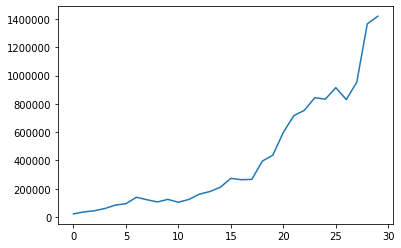

In [49]:
plt.plot(i1) # Otro posible escenario graficado. 

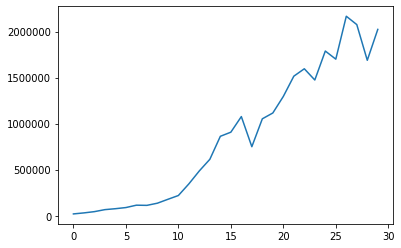

In [57]:
plt.plot(invv(10000,.09,.18,30,10000)) # Más escenarios graficados, este varia cada vez que la celda corra.

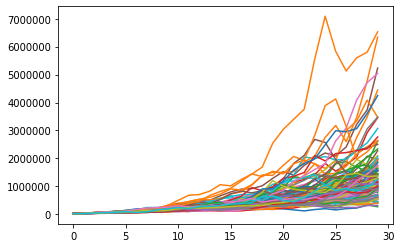

In [55]:
# Simulación montecarlo.
# Simulación de 100 (N) comportamientos de la misma inversión con el interés aleatorio.

N=100 # Número de inversiones.
for i in range(N):
    plt.plot(invv(10000,.09,.18,30,10000))

In [11]:
def invvv(capii,ie,v,años,acap):
    for a in range(años):
        ir=np.random.normal(ie,v)
        vf=capii*(1+ir)+acap
        capii=vf
    return round(capii,4)

In [12]:
invvv(10000,.09,.18,30,10000) # Valor final del capital en 30 años.

2374481.7135

In [70]:
# Simulación montecarlo.
# Simulación de varios (10000) capitales finales para poder analizar.

N=10000
x=[]

for w in range(N):
    x.append(invvv(10000,.09,.18,30,10000))
x

[562309.5852,
 856931.2244,
 674519.49,
 1600563.2473,
 2403250.371,
 1290210.3388,
 649042.4747,
 979672.9892,
 687933.1302,
 1387834.79,
 1849721.3909,
 4890647.0052,
 894690.8894,
 1373222.5676,
 726433.7799,
 757691.0721,
 560356.3519,
 915026.28,
 2993490.1511,
 890099.2467,
 595377.3336,
 918065.6178,
 2073380.6234,
 654192.6467,
 703995.0558,
 1811661.1317,
 1517004.5172,
 4372243.8299,
 1212685.9116,
 3879123.0655,
 951230.9265,
 547585.5262,
 978365.5098,
 1189238.703,
 654054.4338,
 553513.6917,
 691885.3691,
 2524313.9841,
 2538273.8517,
 797039.3845,
 1042507.3484,
 1223756.2501,
 2165440.1608,
 4954745.5709,
 4295219.9596,
 903367.5117,
 530222.5593,
 807803.0368,
 451085.2678,
 624767.9048,
 650980.6062,
 2908348.1097,
 558612.3892,
 1040737.662,
 2152398.0342,
 786057.3806,
 2558456.1647,
 1205528.8578,
 1206184.8924,
 281310.5089,
 441596.3738,
 1037624.4643,
 1242415.4753,
 1519519.2453,
 1455636.1669,
 964406.1173,
 1110498.2742,
 1752617.6214,
 918191.4279,
 1293287.

In [71]:
np.mean(x) # Promedio de dichas 10000 simulación del capital final en 30 años con los datos introducidos.

1492152.2171211198